In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [53]:
ens = pd.read_csv('../ensembl.tsv', sep='\t')

# tapper data:
df = pd.read_excel('../data/mmc1.xls')  # supplementary data from Tapper et al
df.columns = ['Rank', 'Transcript', 'Gene', 'Locus', 'ensembl_gene_id', 'AvailableExperiments',
              'ExpUp', 'ExpDown', 'VoteScore', 'tvalue', 'pvalue', 'fdr', 'DBE', 'DAE', 'daf16', 'pqm1']

res = pd.read_csv('../data/master_table.tsv', sep='\t', index_col=0)

df = df.join(ens.set_index('ensembl_gene_id'), on='ensembl_gene_id'
            ).dropna().drop_duplicates(subset=['ensembl_gene_id']
            ).rename(columns={'chromosome_name': 'chromosome'})

df = df[df.chromosome != 'MtDNA']

Text(0.5, 0, 'Fold Enrichment over Background')

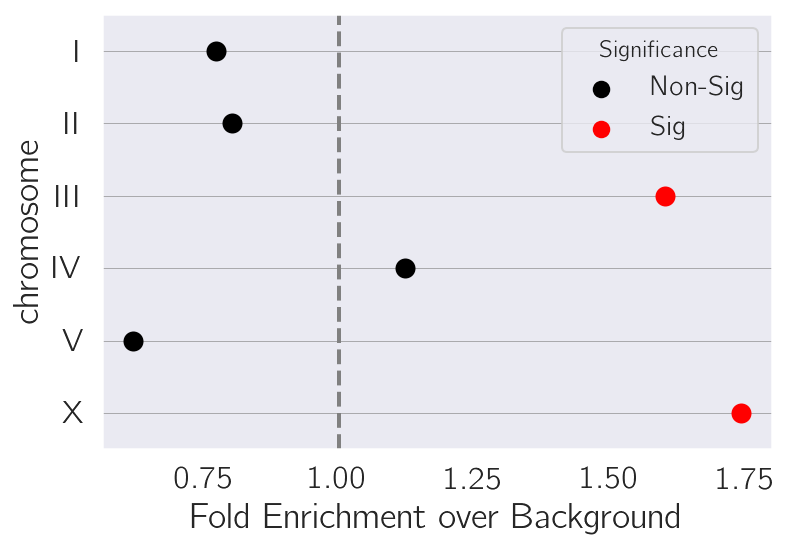

In [54]:
pqm1_chromosome = df[df.pqm1 == 'Y'].groupby(['chromosome']).pqm1.count()
chromosome = df.groupby('chromosome').pqm1.count()
pqm1_dist = pd.DataFrame([chromosome, pqm1_chromosome, pqm1_chromosome / chromosome],
                         index=['Total Genes', 'PQM1-bound genes', 'Fraction of Genes that are PQM1']).T

pqm1_dist['pval'] = pqm1_dist.apply(lambda x: np.min([scipy.stats.hypergeom.sf(x['PQM1-bound genes'],
                                                                       pqm1_dist['Total Genes'].sum(),
                                                                       x['Total Genes'],
                                                                       pqm1_dist['PQM1-bound genes'].sum()) * 6,
                                                     1]),
                                    axis=1)
pqm1_dist[pqm1_dist.pval < 0.05]
pqm1_dist['Significance'] = pqm1_dist.pval.apply(lambda x: 'Sig' if x < 0.05 else 'Non-Sig')
pqm1_dist['Fraction Expected'] = pqm1_dist['Total Genes'] / pqm1_dist['Total Genes'].sum()
pqm1_dist['FoldEnrichment'] = pqm1_dist['Fraction of Genes that are PQM1'] / pqm1_dist['Fraction Expected']

sns.stripplot(x='FoldEnrichment', y='chromosome',
              hue='Significance', hue_order=['Non-Sig', 'Sig'],
              palette=['black', 'red'],
              data=pqm1_dist.reset_index(),
              size=10, jitter=False, dodge=False)

plt.gca().yaxis.grid(color='gray', linewidth=.3)
plt.axvline(1, ls='--', color='gray', lw=2)
plt.xlabel('Fold Enrichment over Background')

# save('pqm1-enrichment.pdf')

Text(0.5, 0, 'Fold Enrichment over Background')

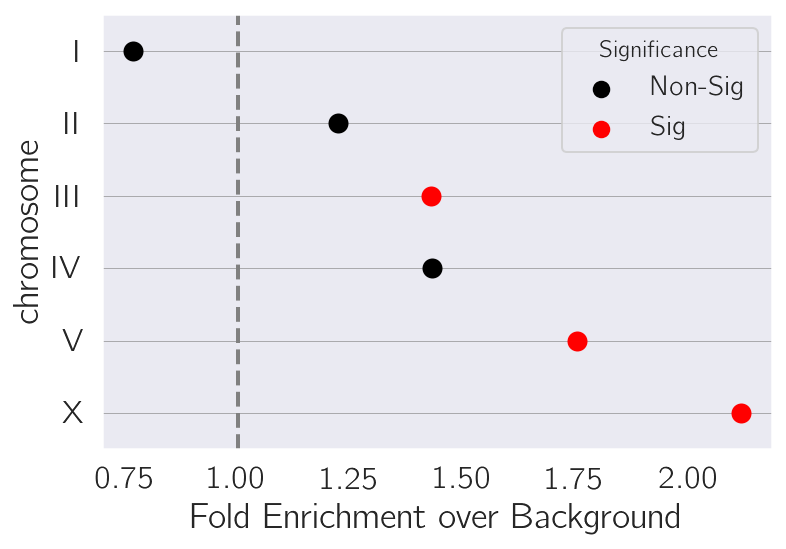

In [55]:
df = df[df.ensembl_gene_id.isin(res.index)]
pqm1_chromosome = df[df.pqm1 == 'Y'].groupby(['chromosome']).pqm1.count()
chromosome = df.groupby('chromosome').pqm1.count()
pqm1_dist = pd.DataFrame([chromosome, pqm1_chromosome, pqm1_chromosome / chromosome],
                         index=['Total Genes', 'PQM1-bound genes', 'Fraction of Genes that are PQM1']).T

pqm1_dist['pval'] = pqm1_dist.apply(lambda x: np.min([scipy.stats.hypergeom.sf(x['PQM1-bound genes'],
                                                                       pqm1_dist['Total Genes'].sum(),
                                                                       x['Total Genes'],
                                                                       pqm1_dist['PQM1-bound genes'].sum()) * 6,
                                                     1]),
                                    axis=1)
pqm1_dist[pqm1_dist.pval < 0.05]
pqm1_dist['Significance'] = pqm1_dist.pval.apply(lambda x: 'Sig' if x < 0.05 else 'Non-Sig')
pqm1_dist['Fraction Expected'] = pqm1_dist['Total Genes'] / pqm1_dist['Total Genes'].sum()
pqm1_dist['FoldEnrichment'] = pqm1_dist['Fraction of Genes that are PQM1'] / pqm1_dist['Fraction Expected']

sns.stripplot(x='FoldEnrichment', y='chromosome',
              hue='Significance', hue_order=['Non-Sig', 'Sig'],
              palette=['black', 'red'],
              data=pqm1_dist.reset_index(),
              size=10, jitter=False, dodge=False)

plt.gca().yaxis.grid(color='gray', linewidth=.3)
plt.axvline(1, ls='--', color='gray', lw=2)
plt.xlabel('Fold Enrichment over Background')